# SI608 Fall 2025 – Homework 2

**Due:** Wednesday, October 8, 12:00PM EST (noon the day before class)

**Instructions:** Please submit your **.ipynb** and **.html** files and **a text file including your genAI chat history related to this homework** to Canvas. Remember to rename the notebook by filling in your uniqname. If you have _additional_ supplementary files (e.g., images), please also attach them in your submission. 

**Collaboration policy:** You may work with others on this but specific answers need to be your own. Please indicate with whom you worked when you turn in this assignment.

## **Question 1 |**  Fitting Models
*[[40 points]]*

In Lab 3, we compared Lada’s Facebook network to a random network to examine whether it was a small world model.  We found that it was likely to be small-world, as it was different from the random model in certain ways: the clustering coefficient was greater and the average shortest path approximated ln(N). This analysis, however, does not tell us what kind of network model it actually is. For this, we need to generate different networks and compare them to the one we observe.

For this question, we will be working with the **San Juan Sur Village dataset** which you worked with in HW1 Question 7. You again will need the file "sj.gml". This network data was collected by sociologists in 1948, who observed visiting patterns among families in the Costa Rican village San Juan Sur. Based on the number of visits, each household was assigned a “status score” ranging from 1 to 14.

To properly compare the San Juan Sur network to the possible network models, it's not enough to generate just one graph. With just one, we can’t be confident (in the statistical sense) whether we found a match: the chance that we get exactly the same thing is slim. Therefore, a better approach is to generate many (say, 200) different instances of the network and find the confidence intervals for the metric of interest (e.g., components, diameter, mean degree).

### **Q1.1 |** Create a function to generate multiple networks + metric confidence intervals
*[[15 points]]*

Write a function that generates 100 instances of an Erdos Renyi graph. The parameters of the function should include number of nodes, link formation probability, and number of networks to generate.

For each of these instances find the following: 
1. diameter (of the largest component), 
2. average shortest path (of the largest component), 
3. average degree, 
4. average clustering coefficient.  

For all 100 networks you generated, identify the 10% confidence interval (i.e., the 5% and 95% bounds). Submit your code and report the intervals for the Erdos-Renyi network with 200 nodes and 0.01 probability 

This may take a few minutes to calculate depending on the speed of your machine, you might want to set a lower number for debugging. On the flip side, you can increase the number to get results you can be more confident in.

In [47]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [5]:
# YOUR CODE HERE

def generate_erdos_metrics(n_nodes=200, p=0.01, n_networks=100, seed=None):
    """
    parameter:
    --------------
    n_nodes : int
        Number of nodes in each network.
    p : float
        Probability of edge formation.
    n_networks : int
        Number of networks to generate.
    seed : int or None
        Random seed for reproducibility.
    """
    if seed is not None:
        np.random.seed(seed)
        
    results = {
        "diameter": [],
        "avg_shortest_path": [],
        "avg_degree": [],
        "avg_clustering": []
    }

    for i in range(n_networks):
        G = nx.erdos_renyi_graph(n_nodes, p)
        
        # Extract the largest connected component
        if not nx.is_connected(G):
            largest_cc = max(nx.connected_components(G), key=len)
            Gc = G.subgraph(largest_cc).copy()
        else:
            Gc = G

        try:
            diameter = nx.diameter(Gc)
            avg_shortest_path = nx.average_shortest_path_length(Gc)
        except nx.NetworkXError:
            diameter = np.nan
            avg_shortest_path = np.nan
    
        avg_degree = np.mean([deg for _, deg in G.degree()])
        avg_clustering = nx.average_clustering(G)
    
        # Store results
        results["diameter"].append(diameter)
        results["avg_shortest_path"].append(avg_shortest_path)
        results["avg_degree"].append(avg_degree)
        results["avg_clustering"].append(avg_clustering)

    # Convert to DataFrame
    df = pd.DataFrame(results)
    
    # Compute 10% confidence interval (5% and 95% bounds)
    summary = df.describe(percentiles=[0.05, 0.95]).loc[["mean", "5%", "95%"]]
    summary.index = ["mean", "lower_5%", "upper_95%"]
    
    return summary


In [10]:
generate_erdos_metrics(200, 0.01, 100, seed=None)

,diameter,avg_shortest_path,avg_degree,avg_clustering
mean,16.15,6.665323,2.0128,0.004983
lower_5%,13.00,5.859264,1.7990,0.000000
upper_95%,20.05,7.833466,2.2005,0.014383


### **Q1.2 |** Inspecting the San Juan Sur Village network
*[[5 points in total]]*

#### **Q1.2.1 |** Load in the San Juan Sur Village graph and report network statistics
*[[2 points]]*

Using the sj.gml file, create an *undirected* graph between two houses if there is a visit from at least one to another.

Is connected: True


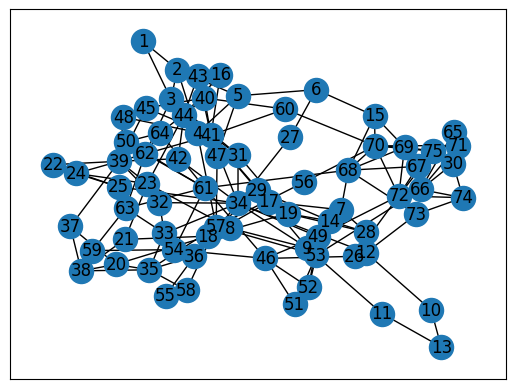

In [12]:
# YOUR CODE HERE
G = nx.read_gml("sj.gml", label="id")
G = G.to_undirected(G)
print(f"Is connected: {nx.is_connected(G)}")
nx.draw_networkx(G)  # to draw the graph
plt.show()  # to force it to draw to the screen

#### **Q1.2.2 |** Report 6 statistics for the San Juan Sur Village network
*[[3 points]]*


Report the following network statistics:
1. number of nodes, 
2. number of edges,
3. diameter,
4. average shortest path, 
5. average degree, 
6. average clustering coefficient

In [9]:
# YOUR CODE HERE

avg_degree = sum(dict(G.degree).values())/G.number_of_nodes()

print(f"Number of nodes: {G.number_of_nodes()}")
print(f"Number of edges: {G.number_of_edges()}")
print(f"Diameter: {nx.diameter(G)}")
print(f"Average shortest path: {nx.average_shortest_path_length(G):.4f}")
print(f"Average degree: {avg_degree:.4f}")
print(f"Average clustering: {nx.average_clustering(G):.4f}")


Number of nodes: 75
Number of edges: 155
Diameter: 7
Average shortest path: 3.4854
Average degree: 4.1333
Average clustering: 0.3174


### **Q1.3 |** Fitting network models to match the San Juan Sur Village graph
*[[6 points total]]*


#### **Q1.3.1 |** Fitting the Erdos Renyi model 
*[[2 points]]*

Identify the proper parameters for an Erdos Renyi network model of approximately the same size (nodes and edges) as the San Juan Sur network. Report the n and p you found.

In [32]:
# YOUR CODE HERE
n = G.number_of_nodes()
egde = G.number_of_edges()
p1 = 2 * egde / (n * (n - 1))
print(f"Number of nodes: {n}")
print(f"Link probability: {p1:.4f}")

Number of nodes: 75
Link probability: 0.0559


#### **Q1.3.2 |** Fitting the Watts Strogatz model
*[[2 points]]*

Now, create a Watts_Strogatz_Graph approximately the same size as San Juan Sur Village graph (See https://networkx.org/documentation/stable/reference/generated/networkx.generators.random_graphs.watts_strogatz_graph.html).

We don’t really know what p is.  You can play with it but when reporting your answers, you can just set it to .2 (somewhat arbitrary).  You’ll need to figure out and report n and k.  Report the actual number of edges for this graph.  It should match pretty closely to the San Juan Sur village network.

In [33]:
# YOUR CODE HERE
k = round(2 * egde / n)
p2 = 0.2
G_ws = nx.watts_strogatz_graph(n, k, p)
print(f"Number of nodes: {G_ws.number_of_nodes()}")
print(f"Number of edges: {G_ws.number_of_edges()}")

Number of nodes: 75
Number of edges: 150


#### **Q1.3.3 |** Fitting the Barabasi Albert model
*[[2 points]]*

Create a Barabasi_albert_graph that is approximately as large as the San Juan Sur Village graph, and report the n and m values you used. Report the actual number of edges for this graph. Again, you’ll need to play with it a little, but you should be able to get a rough match.

In [26]:
# YOUR CODE HERE
m = 2
G_ba = nx.barabasi_albert_graph(n, m)
print(f"Number of nodes: {G_ba.number_of_nodes()}")
print(f"Number of edges: {G_ba.number_of_edges()}")

Number of nodes: 75
Number of edges: 146


### **Q1.4 |** Finding the best fit
*[[9 points total]]*

#### **Q1.4.1 |** Use the confidence interval function on the network models 
*[[4
 points]]*

Execute the confidence interval finding code on the three graph types you found in Q1.3, and report the values for all three of the network models: Erdos_Renyi, Watts_Strogatz, Barabasi_Albert.  

(Again, this might take a bit of time, you might want to go do something else while it runs, 3 points for each type of network generator)

In [34]:
# YOUR CODE HERE
# Erdos–Renyi
er_metrics = generate_erdos_metrics(n_nodes=n, p=p1, n_networks=100, seed=None)
print("Erdos–Renyi summary:")
display(er_metrics)

# Watts–Strogatz
def generate_ws_metrics(n_nodes=n, k=k, p=p2, n_networks=100, seed=None):
    results = {"diameter": [], "avg_shortest_path": [], "avg_degree": [], "avg_clustering": []}

    for i in range(n_networks):
        G = nx.watts_strogatz_graph(n_nodes, k, p, seed=seed+i if seed else None)
        if not nx.is_connected(G):
            Gc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
        else:
            Gc = G
        results["diameter"].append(nx.diameter(Gc))
        results["avg_shortest_path"].append(nx.average_shortest_path_length(Gc))
        results["avg_degree"].append(np.mean([deg for _, deg in G.degree()]))
        results["avg_clustering"].append(nx.average_clustering(G))

    df = pd.DataFrame(results)
    summary = df.describe(percentiles=[0.05, 0.95]).loc[["mean", "5%", "95%"]]
    summary.index = ["mean", "lower_5%", "upper_95%"]
    return summary

ws_metrics = generate_ws_metrics()
print("Watts–Strogatz summary:")
display(ws_metrics)

# Barabasi–Albert
def generate_ba_metrics(n_nodes=n, m=m, n_networks=100, seed=None):

    results = {"diameter": [], "avg_shortest_path": [], "avg_degree": [], "avg_clustering": []}

    for i in range(n_networks):
        G = nx.barabasi_albert_graph(n_nodes, m, seed=seed+i if seed else None)
        if not nx.is_connected(G):
            Gc = G.subgraph(max(nx.connected_components(G), key=len)).copy()
        else:
            Gc = G
        results["diameter"].append(nx.diameter(Gc))
        results["avg_shortest_path"].append(nx.average_shortest_path_length(Gc))
        results["avg_degree"].append(np.mean([deg for _, deg in G.degree()]))
        results["avg_clustering"].append(nx.average_clustering(G))

    df = pd.DataFrame(results)
    summary = df.describe(percentiles=[0.05, 0.95]).loc[["mean", "5%", "95%"]]
    summary.index = ["mean", "lower_5%", "upper_95%"]
    return summary

ba_metrics = generate_ba_metrics()
print("Barabasi–Albert summary:")
display(ba_metrics)


Erdos–Renyi summary:


,diameter,avg_shortest_path,avg_degree,avg_clustering
mean,6.72,3.135039,4.152533,0.052719
lower_5%,6.00,2.887207,3.652000,0.029266
upper_95%,8.00,3.414258,4.752000,0.089286


Watts–Strogatz summary:


,diameter,avg_shortest_path,avg_degree,avg_clustering
mean,7.68,3.887341,4.0,0.285321
lower_5%,7.00,3.672973,4.0,0.227865
upper_95%,9.00,4.189117,4.0,0.348254


Barabasi–Albert summary:


,diameter,avg_shortest_path,avg_degree,avg_clustering
mean,5.14,2.867503,3.893333,0.151599
lower_5%,5.00,2.769225,3.893333,0.093993
upper_95%,6.00,2.985676,3.893333,0.213446


#### **Q1.4.2 |** Which network model fits the San Juan Sur Village graph best? 
*[[5 points]]*

Compare the values of the San Juan Sur network to the values you found in Q1.4.1.  Which ones seem to fit within the bounds of the confidence intervals you found?  (Note, there may not be a perfect graph type that models the network perfectly).  

Speculate on the properties of the networks that do fit and what that might mean about the San Juan Sur Village network?

- The values of San Juan Sur network
    - nodes: 75
    - edges: 155
    - diameter: 7
    - average shortest path: 3.48
    - average degree: 4.13
    - average clustering: 0.317
- According to the answer of Q1.4.1, Watts Strogatz fits best.
- The erdos-renyi model underestimates the average shortest paths and the clustering coefficient; and the Barabasi-Albert underestimates all the properties.
- The San Juan Sur Village network shows a relatively high clustering coefficient (0.317) and a moderate average shortest path length (3.48), which are characteristic of small-world networks.

## **Question 2 |**  Small World Networks
*[[20 points]]*

### **Q2.1 |** Compute clustering coefficient and avg shortest path for bitcoin graph
*[[10 points]]*


Compute the clustering coefficient and the average shortest path of the largest **strongly** connected component in http://snap.stanford.edu/data/soc-sign-bitcoin-alpha.html. For this exercise, please create an unweighted and directed graph $G = (V,E)$ where V are the set of bitcoin users and $E = {e_ij}$ where i has indicated a rating (either positive or negative) for user j.

In [40]:
# YOUR CODE HERE
df = pd.read_csv("soc-sign-bitcoinalpha.csv", header=None)
df.columns = ["source", "target", "rating", "time"]
G = nx.DiGraph()
G.add_edges_from(df[["source", "target"]].values)

largest_scc = max(nx.strongly_connected_components(G), key=len)
G_scc = G.subgraph(largest_scc).copy()
print(f"Largest strongly connected component size: {G_scc.number_of_nodes()}")

avg_clustering = nx.average_clustering(G_scc.to_undirected())
print(f"Average clustering coefficient: {avg_clustering:.4f}")

avg_shortest_path = nx.average_shortest_path_length(G_scc)
print(f"Average shortest path length: {avg_shortest_path:.4f}")

Largest strongly connected component size: 3235
Average clustering coefficient: 0.1890
Average shortest path length: 3.6485


### **Q2.2 |** Compute clustering coefficient and avg shortest path with different parameters
*[[2 points]]*


Compute the clustering coefficient and the average shortest path of the largest strongly connected component of graph $G’ = (V,E’)$ where $E’ = {e_ij}$ where i has indicated a positive  review of j.

In [42]:
# YOUR CODE HERE
df_pos = df[df["rating"] > 0]
G_pos = nx.DiGraph()
G_pos.add_edges_from(df_pos[["source", "target"]].values)

largest_scc_pos = max(nx.strongly_connected_components(G_pos), key=len)
G_pos_scc = G_pos.subgraph(largest_scc_pos).copy()

print(f"Largest SCC size: {G_pos_scc.number_of_nodes()}")

avg_clustering_pos = nx.average_clustering(G_pos_scc.to_undirected())
avg_shortest_path_pos = nx.average_shortest_path_length(G_pos_scc)

print(f"Average clustering coefficient (positive network): {avg_clustering_pos:.4f}")
print(f"Average shortest path length (positive network): {avg_shortest_path_pos:.4f}")

Largest SCC size: 3192
Average clustering coefficient (positive network): 0.1783
Average shortest path length (positive network): 3.7002


### **Q2.3 |** Compute clustering coefficient and avg shortest path with yet again different parameters
*[[3 points]]*

Compute the clustering coefficient and the average shortest path of the largest strongly connected component of graph $Gx’’ = (V, E_x’’)$ where $E_x’’ = {e_ij}$ where i has indicated a review with at least x for user j. Compute these two measures for x = 5,6,7

In [43]:
# YOUR CODE HERE
def compute_metrics_for_threshold(x):
    df_x = df[df["rating"] >= x]
    G = nx.DiGraph()
    G.add_edges_from(df_x[["source", "target"]].values)
    
    largest_scc = max(nx.strongly_connected_components(G), key=len)
    G_scc = G.subgraph(largest_scc).copy()
    
    avg_clustering = nx.average_clustering(G_scc.to_undirected())
    avg_shortest_path = nx.average_shortest_path_length(G_scc)
    
    return {
        "threshold": x,
        "nodes": G_scc.number_of_nodes(),
        "edges": G_scc.number_of_edges(),
        "avg_clustering": avg_clustering,
        "avg_shortest_path": avg_shortest_path
    }

results = [compute_metrics_for_threshold(x) for x in [5, 6, 7]]

# Step 4: 输出结果
import pandas as pd
pd.DataFrame(results)

,threshold,nodes,edges,avg_clustering,avg_shortest_path
0,5,333,1127,0.164967,4.645401
1,6,155,441,0.150183,4.935191
2,7,103,273,0.181434,6.647249


### **Q2.4 |** Interpreting results
*[[5 points]]*

Report on the patterns you observe across the various graphs. Does the original graph have small world characteristics? What happens to clustering coefficient and average shortest path?

The original Bitcoin Alpha network has small-world characteristics. It has a relatively high clustering coefficient and a moderate average shortest path length, suggesting that users are locally well connected.

When restricting the network to only positive relationships (Q2.2), both the size and density of the graph decrease. As a result, the average shortest path length slightly increases, while the clustering coefficient tends to remain similar or slightly higher. This implies that users with mutual trust form more tightly-knit communities.

As the rating threshold increases further (Q2.3), we observe a clear pattern:
- The number of nodes and edges decreases.
- The **average clustering coefficient increases**, indicating that high-trust connections form dense clusters or social circles.
- The **average shortest path length increases**, since higher thresholds remove weaker ties that otherwise serve as bridges between communities.


## **Question 3 |**  Bow Tie Model
*[[20 points]]*

### **Q3.1 |** Learning about the Bow Tie model
*[[5 points]]*

A different model for networks we haven't yet considered is the bow-tie model.  We see this kind of network on the Web. A generic image of this type of network is displayed here.  

Please read http://cs.wellesley.edu/~pmetaxas/Why_Is_the_the_Web_a_Bowtie.pdf

Provide a description of the core, in, out, tendril, and island components for the bow-tie model.

<img src="bow-tie.jpg" width=600 align="top">

- The SCC is the center, where every site can reach every other via hyperlinks.
- The 'IN' component contains pages that can reach the SCC but cannot be reached from it.
- The 'OUT' component includes pages that are reachable from the SCC but have no links back to it.
- Tendrils and Tubes are pages loosely connected to IN or OUT, often forming peripheral or bridge-like subgraphs.
- Islands are disconnected components that have no links to or from the main web.

### **Q3.2 |** Computing component sizes for the Bow Tie model
*[[10 points]]*

Ignore for the moment tubes, tendrils, and disconnected components.  Write a program in python (using networkx) to calculate the sizes of each of those main 3 pieces (IN, SCC, and OUT).

Fill out the following function:

def bowtie(grph):
<br>&emsp;	IN = …
<br>&emsp;	OUT = …
<br>&emsp;	SCC = …
<br>&emsp;	…
<br>&emsp;	return([IN,OUT,SCC])




In [44]:
# YOUR CODE HERE
def bowtie(grph):
    sccs = list(nx.strongly_connected_components(grph))
    largest_scc = max(sccs, key=len)
    SCC = len(largest_scc)

    out_nodes = set()
    for node in largest_scc:
        out_nodes |= nx.descendants(grph, node)
    OUT = len(out_nodes - largest_scc)

    in_nodes = set()
    for node in largest_scc:
        in_nodes |= nx.ancestors(grph, node)
    IN = len(in_nodes - largest_scc)

    # Step 4. 返回各部分的节点数
    return {"IN": IN, "OUT": OUT, "SCC": SCC}

### **Q3.3 |** Running your code
*[[5 points]]*

Load in the BowTie.gml file and test your new function.  Report the sizes for IN, OUT, and SCC. Turn in the code and your answer

In [45]:
# YOUR CODE HERE
bt = nx.read_gml("BowTie.gml")
print(bowtie(bt))

{'IN': 23, 'OUT': 37, 'SCC': 63}


## **Question 4 |** Barabási-Albert Model Part 1
*[[10 points in total]]*

You are tasked with analyzing a Barabási-Albert (BA) model. The degree evolution of two vertices is of interest: one vertex introduced early at  t = 5  and another vertex introduced later at  t = 95.

### **Q4.1 |** Create an BA model
*[[5 points]]*

Create a BA model with 5 initial nodes. After the initial graph is formed, extend the graph to 10,000 nodes by adding new nodes step-by-step, where each new node connects to 2 existing nodes.

Track the degree evolution of:
1. A vertex introduced early at  t = 5  (i.e., the 5th Vertex overall in the graph).
2. A vertex introduced later at  t = 95  (i.e., the node introduced later in the network’s evolution).
3. Plot the degree evolution of both the early and late vertices on a log-log scale.


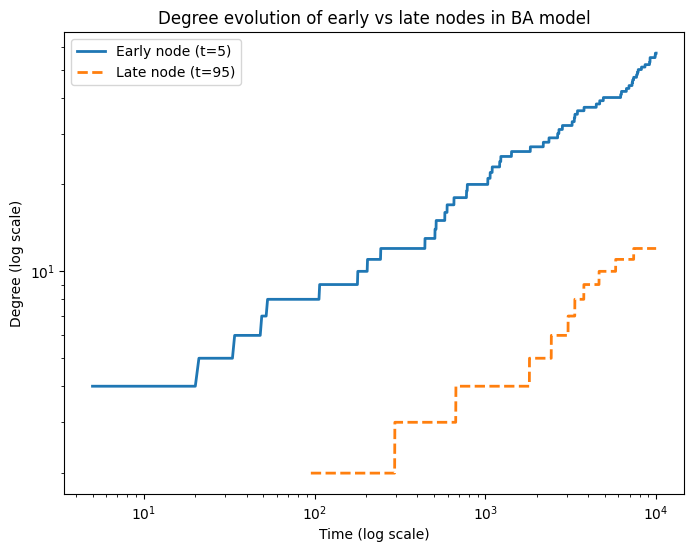

In [51]:
# YOUR CODE HERE
random.seed(608)

n_initial = 5
n_final = 10000
m = 2

# initialize the graph
G = nx.complete_graph(n_initial)

early_node = 5
late_node = 95

degree_early = [G.degree(early_node - 1)]  # 节点索引从0开始
degree_late = []  # 尚未出现时度为0
# 时间记录（独立时间轴）
time_early = [n_initial]
time_late = []

# BA 增长过程
for t in range(n_initial, n_final):
    nodes = list(G.nodes())
    degrees = np.array([G.degree(node) for node in nodes], dtype=float)
    prob = degrees / degrees.sum()
    targets = np.random.choice(nodes, size=m, replace=False, p=prob)
    
    # 添加新节点
    G.add_node(t)
    for target in targets:
        G.add_edge(t, target)
    
    # --- 记录 early node ---
    if early_node - 1 in G:
        degree_early.append(G.degree(early_node - 1))
        time_early.append(t)
    
    # --- 记录 late node ---
    if t >= late_node:  # 95号节点出现在 t=94 之后
        degree_late.append(G.degree(late_node - 1))
        time_late.append(t)

# 绘图
plt.figure(figsize=(8,6))
plt.loglog(time_early, degree_early, label=f"Early node (t={early_node})", lw=2)
plt.loglog(time_late, degree_late, label=f"Late node (t={late_node})", lw=2, linestyle="--")
plt.xlabel("Time (log scale)")
plt.ylabel("Degree (log scale)")
plt.legend()
plt.title("Degree evolution of early vs late nodes in BA model")
plt.show()

### **Q4.2 |** Compute the clustering coefficient for the BA model
*[[5 points]]*

Compute the graph-level clustering coefficient of the network as it grows. For this, compute the clustering coefficient after every 10 nodes are added, starting from the initial 5-node graph, and track how it changes over time.

1. Clustering Coefficient Calculation: As the graph grows, after every 10 nodes added, compute the graph’s clustering coefficient.
2. Plot: Create a plot showing the clustering coefficient on the y-axis and the number of nodes on the x-axis.
3. Interpretation: Analyze and interpret how the clustering coefficient changes as the network grows. Does it increase, decrease, or remain constant? How does the structure of the graph affect this?

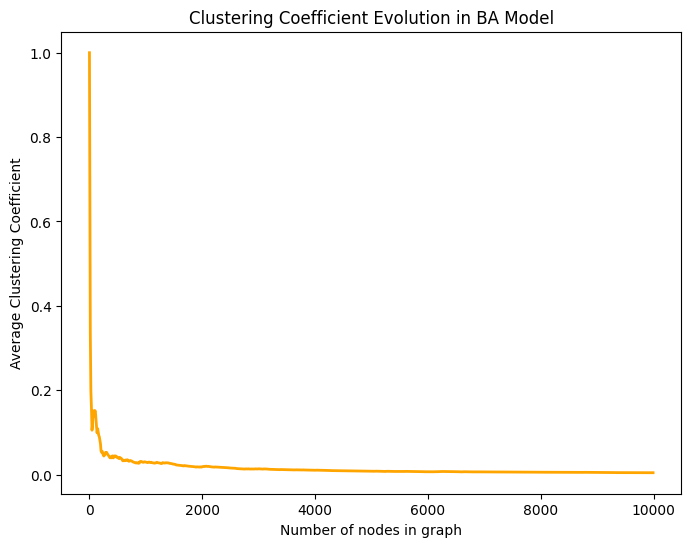

In [54]:
# YOUR CODE HERE
random.seed(608)
n_initial = 5
n_final = 10000
m = 2

G = nx.complete_graph(n_initial)

clustering_values = [nx.average_clustering(G)]
node_counts = [n_initial]

for t in range(n_initial, n_final):
    nodes = list(G.nodes())
    degrees = np.array([G.degree(node) for node in nodes], dtype=float)
    prob = degrees / degrees.sum()
    
    targets = np.random.choice(nodes, size=m, replace=False, p=prob)
    
    G.add_node(t)
    for target in targets:
        G.add_edge(t, target)
    
    if t % 10 == 0:
        clustering_values.append(nx.average_clustering(G))
        node_counts.append(t)

plt.figure(figsize=(8,6))
plt.plot(node_counts, clustering_values, color='orange', lw=2)
plt.xlabel("Number of nodes in graph")
plt.ylabel("Average Clustering Coefficient")
plt.title("Clustering Coefficient Evolution in BA Model")
plt.show()

### Explanation

As the BA model grows, the average clustering coefficient decreases gradually.
Because each new node attaches to a few existing nodes, often high-degree hubs, but does not form many triangles among its neighbors.
Consequently, when the number of nodes increases, the network becomes more tree-like and less clustered.

## **Question 5 |** Barabási-Albert Model Part 2
*[[10 points in total]]*

![Description of the image](q5_graph.png)

### **Q5.1 |** Identify the most likely connections in a standard BA model
*[[5 points]]*

The following network is being created through the Barabasi-Albert attachment model. 

Identify the three nodes the yellow node is most likely to connect to. 

Report the probability of connecting to those three nodes.  Show your work.

- The probability of attaching Node Q: degree of node/total degree
- Total degree: 30
- The top 3 nodes by degree:
    - G: 5
    - C: 4
    - H & I: 3
- Probability
    - G: 1/6
    - C: 2/15
    - H & I: 1/10  

### **Q5.2 |** Identify the most likely connections in an adapted BA model
*[[5 points]]*

Assume the network follows an adapted BA model. With a 25% chance the new node will be connected to some other node at random, and with an 75% chance it will be connected to one of the nodes through the standard preferential attachment model (as in part a). 

Report the attachment probabilities for the two nodes you picked above (most and second most likely) as well the probability of attaching to nodes A and K (so you will report 4 probabilities). Show your work. 

- Probability of Random Attached:
    - $P_0 = \cfrac{1}{N} = \cfrac{1}{16}$ 
- Probability of Connecting Node G
    - $P_G = 0.25\times \cfrac{1}{16}+ 0.75\times \cfrac{1}{6}=0.14625$
- Probability of Connecting Node C
    - $P_C = 0.25\times \cfrac{1}{16}+ 0.75\times \cfrac{2}{15}=0.115625$
- Probability of Connecting Node A
    - $P_A = 0.25\times\cfrac{1}{16}+0.75\times \cfrac{1}{30}=0.04625$
- Probability of Connecting Node K
    - $P_K = 0.25\times\cfrac{1}{16}+0.75\times \cfrac{1}{30}=0.04625$